<a href="https://colab.research.google.com/github/AlvinMaul/uts-pengolahan-citra_Muhammad-Alvin-Maulana_237006516072/blob/main/Latihan_3_Muhammad_Alvin_Maulana_237006516072.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

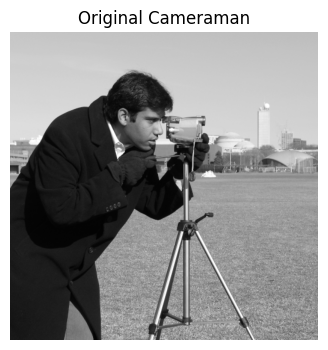

In [ ]:
img = data.camera().astype(np.float32)

plt.figure(figsize=(4,4))
plt.imshow(img, cmap='gray')
plt.title("Original Cameraman")
plt.axis('off')


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

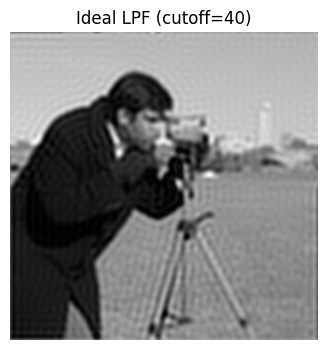

In [ ]:
def ideal_lpf(shape, cutoff):
    h, w = shape
    u, v = np.meshgrid(np.arange(w), np.arange(h))
    du = u - w/2
    dv = v - h/2
    D = np.sqrt(du**2 + dv**2)
    H = np.zeros((h,w))
    H[D <= cutoff] = 1
    return H

def apply_ilpf(image, cutoff):
    F = np.fft.fft2(image)
    Fshift = np.fft.fftshift(F)

    H = ideal_lpf(image.shape, cutoff)
    G = Fshift * H

    ishift = np.fft.ifftshift(G)
    filtered = np.abs(np.fft.ifft2(ishift))
    return filtered

ilpf_result = apply_ilpf(img, cutoff=40)

plt.figure(figsize=(4,4))
plt.imshow(ilpf_result, cmap='gray')
plt.title("Ideal LPF (cutoff=40)")
plt.axis('off')


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

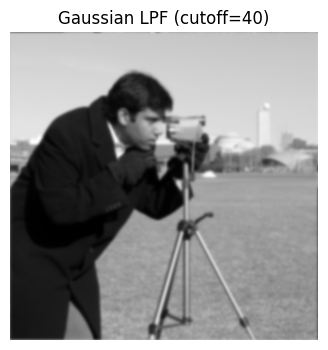

In [ ]:
def gaussian_lpf(shape, cutoff):
    h, w = shape
    u, v = np.meshgrid(np.arange(w), np.arange(h))
    du = u - w/2
    dv = v - h/2
    D = np.sqrt(du**2 + dv**2)
    H = np.exp(-(D**2)/(2*(cutoff**2)))
    return H

def apply_glpf(image, cutoff):
    F = np.fft.fft2(image)
    Fshift = np.fft.fftshift(F)

    H = gaussian_lpf(image.shape, cutoff)
    G = Fshift * H

    ishift = np.fft.ifftshift(G)
    filtered = np.abs(np.fft.ifft2(ishift))
    return filtered

glpf_result = apply_glpf(img, cutoff=40)

plt.figure(figsize=(4,4))
plt.imshow(glpf_result, cmap='gray')
plt.title("Gaussian LPF (cutoff=40)")
plt.axis('off')


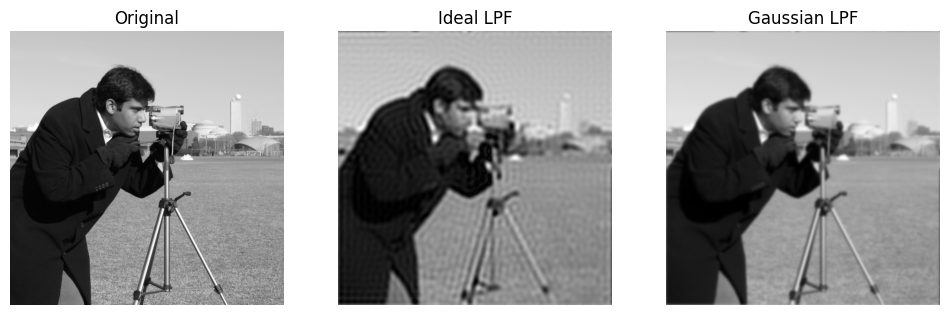

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(ilpf_result, cmap='gray')
plt.title("Ideal LPF")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(glpf_result, cmap='gray')
plt.title("Gaussian LPF")
plt.axis('off')

plt.show()


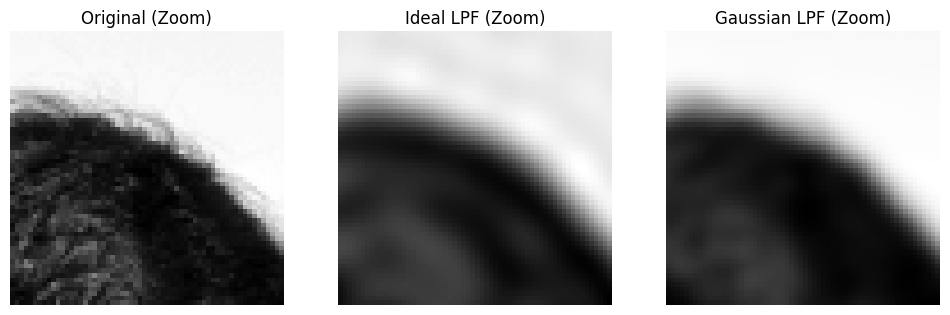

In [ ]:
# Area zoom (tentukan area tepi)
x1, x2 = 200, 260
y1, y2 = 50, 110

orig_crop = img[y1:y2, x1:x2]
ilpf_crop = ilpf_result[y1:y2, x1:x2]
glpf_crop = glpf_result[y1:y2, x1:x2]

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(orig_crop, cmap='gray')
plt.title("Original (Zoom)")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(ilpf_crop, cmap='gray')
plt.title("Ideal LPF (Zoom)")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(glpf_crop, cmap='gray')
plt.title("Gaussian LPF (Zoom)")
plt.axis('off')

plt.show()


In [ ]:
print("""
=== IDENTIFIKASI ARTEFAK LATIHAN 3 ===

1. IDEAL LPF (ILPF)
   • Menghasilkan artefak 'ringing' berupa garis-garis gelombang
     di sekitar tepi objek.
   • Penyebab: Diskontinuitas pada domain frekuensi
     menyebabkan 'sinc ringing' pada domain spasial.
   • Overshoot terjadi di batas terang-gelap.
   • Aliasing terlihat pada detail kecil yang tidak terfilter halus.

2. GAUSSIAN LPF (GLPF)
   • Hampir tidak ada ringing.
   • Transisi frekuensi halus → tidak menimbulkan gelombang.
   • Overshoot minimal.
   • Hasil lebih natural dan tidak memiliki pola bergaris.

3. PERBANDINGAN ILPF vs GLPF
   • ILPF → blur kuat + ringing + overshoot.
   • GLPF → blur halus tanpa artefak.
   • ILPF tidak baik untuk filtering natural.
   • GLPF jauh lebih stabil dan aman untuk citra real-world.

Kesimpulan:
ILPF menimbulkan ringing karena 'pemotongan' frekuensi secara tiba-tiba.
Sedangkan GLPF menggunakan kurva halus sehingga tidak menyebabkan artefak.
""")



=== IDENTIFIKASI ARTEFAK LATIHAN 3 ===

1. IDEAL LPF (ILPF)
   • Menghasilkan artefak 'ringing' berupa garis-garis gelombang
     di sekitar tepi objek.
   • Penyebab: Diskontinuitas pada domain frekuensi
     menyebabkan 'sinc ringing' pada domain spasial.
   • Overshoot terjadi di batas terang-gelap.
   • Aliasing terlihat pada detail kecil yang tidak terfilter halus.

2. GAUSSIAN LPF (GLPF)
   • Hampir tidak ada ringing.
   • Transisi frekuensi halus → tidak menimbulkan gelombang.
   • Overshoot minimal.
   • Hasil lebih natural dan tidak memiliki pola bergaris.

3. PERBANDINGAN ILPF vs GLPF
   • ILPF → blur kuat + ringing + overshoot.
   • GLPF → blur halus tanpa artefak.
   • ILPF tidak baik untuk filtering natural.
   • GLPF jauh lebih stabil dan aman untuk citra real-world.

Kesimpulan:
ILPF menimbulkan ringing karena 'pemotongan' frekuensi secara tiba-tiba.
Sedangkan GLPF menggunakan kurva halus sehingga tidak menyebabkan artefak.

